# Random Forest(Fraud Check)


Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\DS\15. Random Forests\Fraud_check.csv")


In [4]:
df.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.shape


(600, 6)

In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df['Undergrad']= df['Undergrad'].apply(lambda x: 1 if x=='YES' else 0)
df['Urban']= df['Urban'].apply(lambda x: 1 if x=='YES' else 0)
df['Taxable.Income']= df['Taxable.Income'].apply(lambda x: 'Risky' if x>30000 else 'Good')


In [8]:
df['Marital.Status'].value_counts()


Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [9]:
df['Marital.Status'] = df['Marital.Status'].map({'Single':1, 'Married':2, 'Divorced':3})


In [10]:
df.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,Risky,50047,10,1
1,1,3,Risky,134075,18,1
2,0,2,Risky,160205,30,1
3,1,1,Risky,193264,15,1
4,0,2,Risky,27533,28,0


In [11]:
df['Marital.Status'].value_counts()


1    217
2    194
3    189
Name: Marital.Status, dtype: int64

In [12]:
import seaborn as sns


In [13]:
# riskey = 0, good = 1

df['Taxable.Income']= df['Taxable.Income'].apply(lambda x: 0 if x=='Risky'else 1)


In [14]:
# Train test the Data

train = df.drop('Taxable.Income', axis=1)
test = df['Taxable.Income']

In [15]:
# Train test split

from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 1)


In [17]:
# Standardize the Data

from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()


In [19]:
col = x_train.columns
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
x_train.shape


(420, 5)

In [21]:
x_test.shape


(180, 5)

In [22]:
# Build random forest


In [23]:
from sklearn.ensemble import RandomForestClassifier


In [24]:
df.head(2)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,0,50047,10,1
1,1,3,0,134075,18,1


In [25]:
rf_model = RandomForestClassifier(n_estimators= 100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
rf_model_pred = rf_model.predict(x_test)


In [27]:
rf_model_actual_predict = pd.DataFrame({'Actual': y_test, 'Predict': rf_model_pred})


In [28]:
rf_model_actual_predict[20:40]


,Actual,Predict
13,0,0
510,0,0
268,0,0
358,0,0
289,0,1
483,1,0
429,0,0
47,0,0
223,0,0
185,0,0


In [29]:
rf_model.score(x_test, y_test)*100


77.77777777777779

In [30]:
# Apply Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
bg = BaggingClassifier(base_estimator = DecisionTreeClassifier(), max_samples =0.5, max_features = 1.0, n_estimators = 100, random_state = 8 )


In [32]:
bg.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=100, random_state=8)

In [33]:
bg_prid = bg.predict(x_test)

In [34]:
bg_actual_prid = pd.DataFrame({'Actual': y_test, 'predict': bg_prid})


In [35]:
bg_actual_prid[:10]


,Actual,predict
446,1,0
404,0,0
509,1,0
455,0,0
201,0,0
23,0,0
415,0,0
548,0,0
66,0,0
165,0,0


In [36]:
bg.score(x_test, y_test)

0.7888888888888889

In [37]:
# Ada Boosting

from sklearn.ensemble import AdaBoostClassifier

In [38]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, learning_rate=1)


In [39]:
boost.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [40]:
boost_pred = boost.predict(x_test)


In [41]:
boost_actual_predict = pd.DataFrame({'Actual': y_test, 'predict': boost_pred})


In [42]:
boost_actual_predict[:10]


,Actual,predict
446,1,1
404,0,1
509,1,0
455,0,0
201,0,0
23,0,0
415,0,1
548,0,0
66,0,0
165,0,1


In [43]:
boost.score(x_test, y_test)


0.6611111111111111

In [44]:
# Build the Random Forest model using kfold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [45]:
kfold = KFold(n_splits=10)
num_trees = 100
max_feature = 3
rfc = RandomForestClassifier(n_estimators=num_trees, max_features = max_feature)
rfc = cross_val_score(rfc, train, test, cv = kfold)
rfc

array([0.78333333, 0.76666667, 0.66666667, 0.68333333, 0.71666667,
       0.63333333, 0.86666667, 0.71666667, 0.73333333, 0.85      ])

In [46]:
rfc.mean()*100


74.16666666666667

In [47]:
rfc.std()*100


7.197607627229729

# Company Data


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [89]:
pip install pydotplus


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=35ab5a2c67b88dd377c62503a1361348659e4032187a472bb300aca1059e7074
  Stored in directory: c:\users\vikal\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [90]:
import pydotplus

In [91]:
df = pd.read_csv(r"D:\DS\15. Random Forests\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [92]:
df1 = df.copy()


In [93]:
df1.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [94]:
df1.isnull().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# Outlier Check


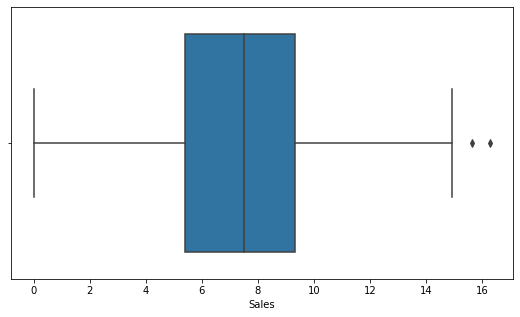

In [95]:
ax = sns.boxplot(df1['Sales'])
plt.show()


# The data has 2 outlier instances


In [96]:
plt.rcParams["figure.figsize"] = 9,5


Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


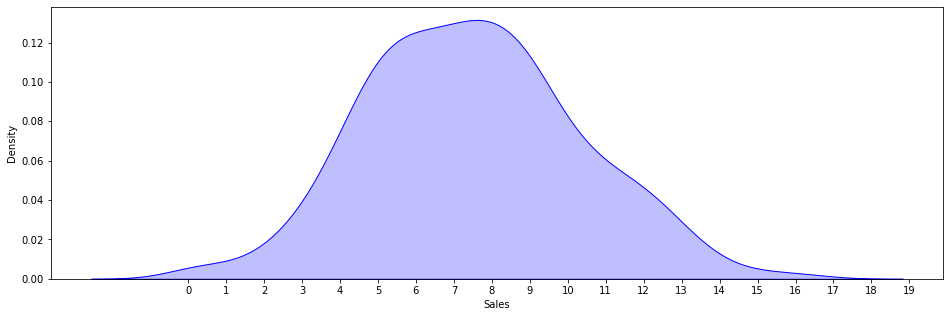

In [97]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

# The data is Skwed on the right


# The data has negative Kurtosis


In [98]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()


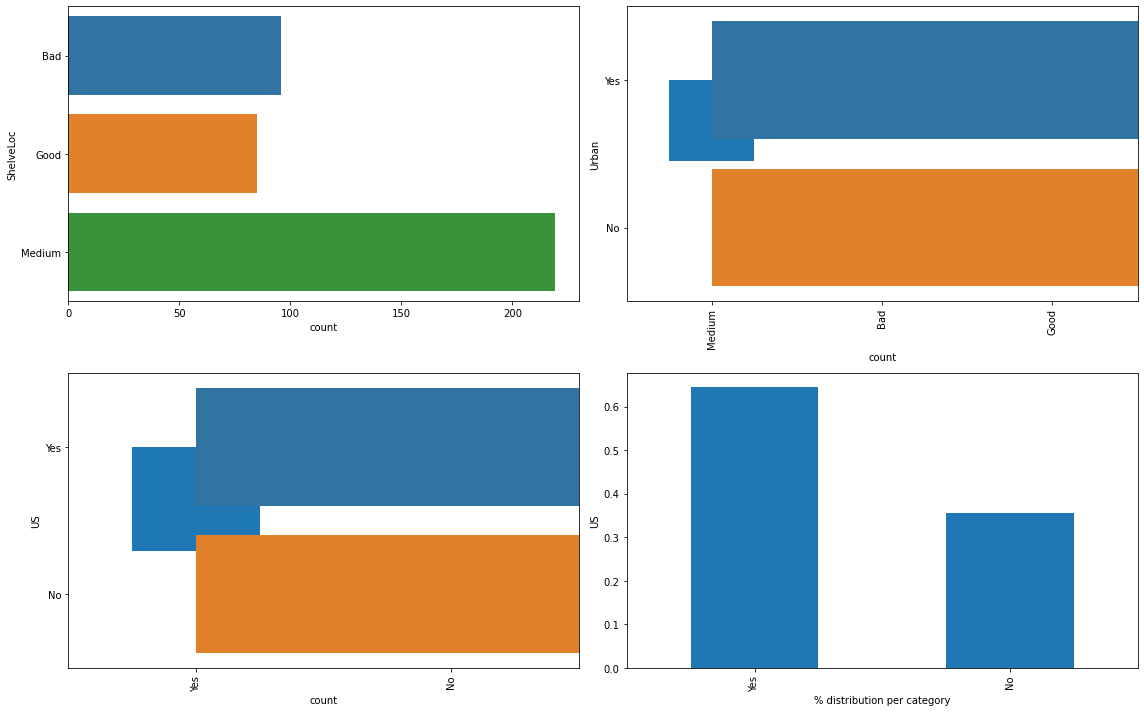

In [99]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

In [100]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()


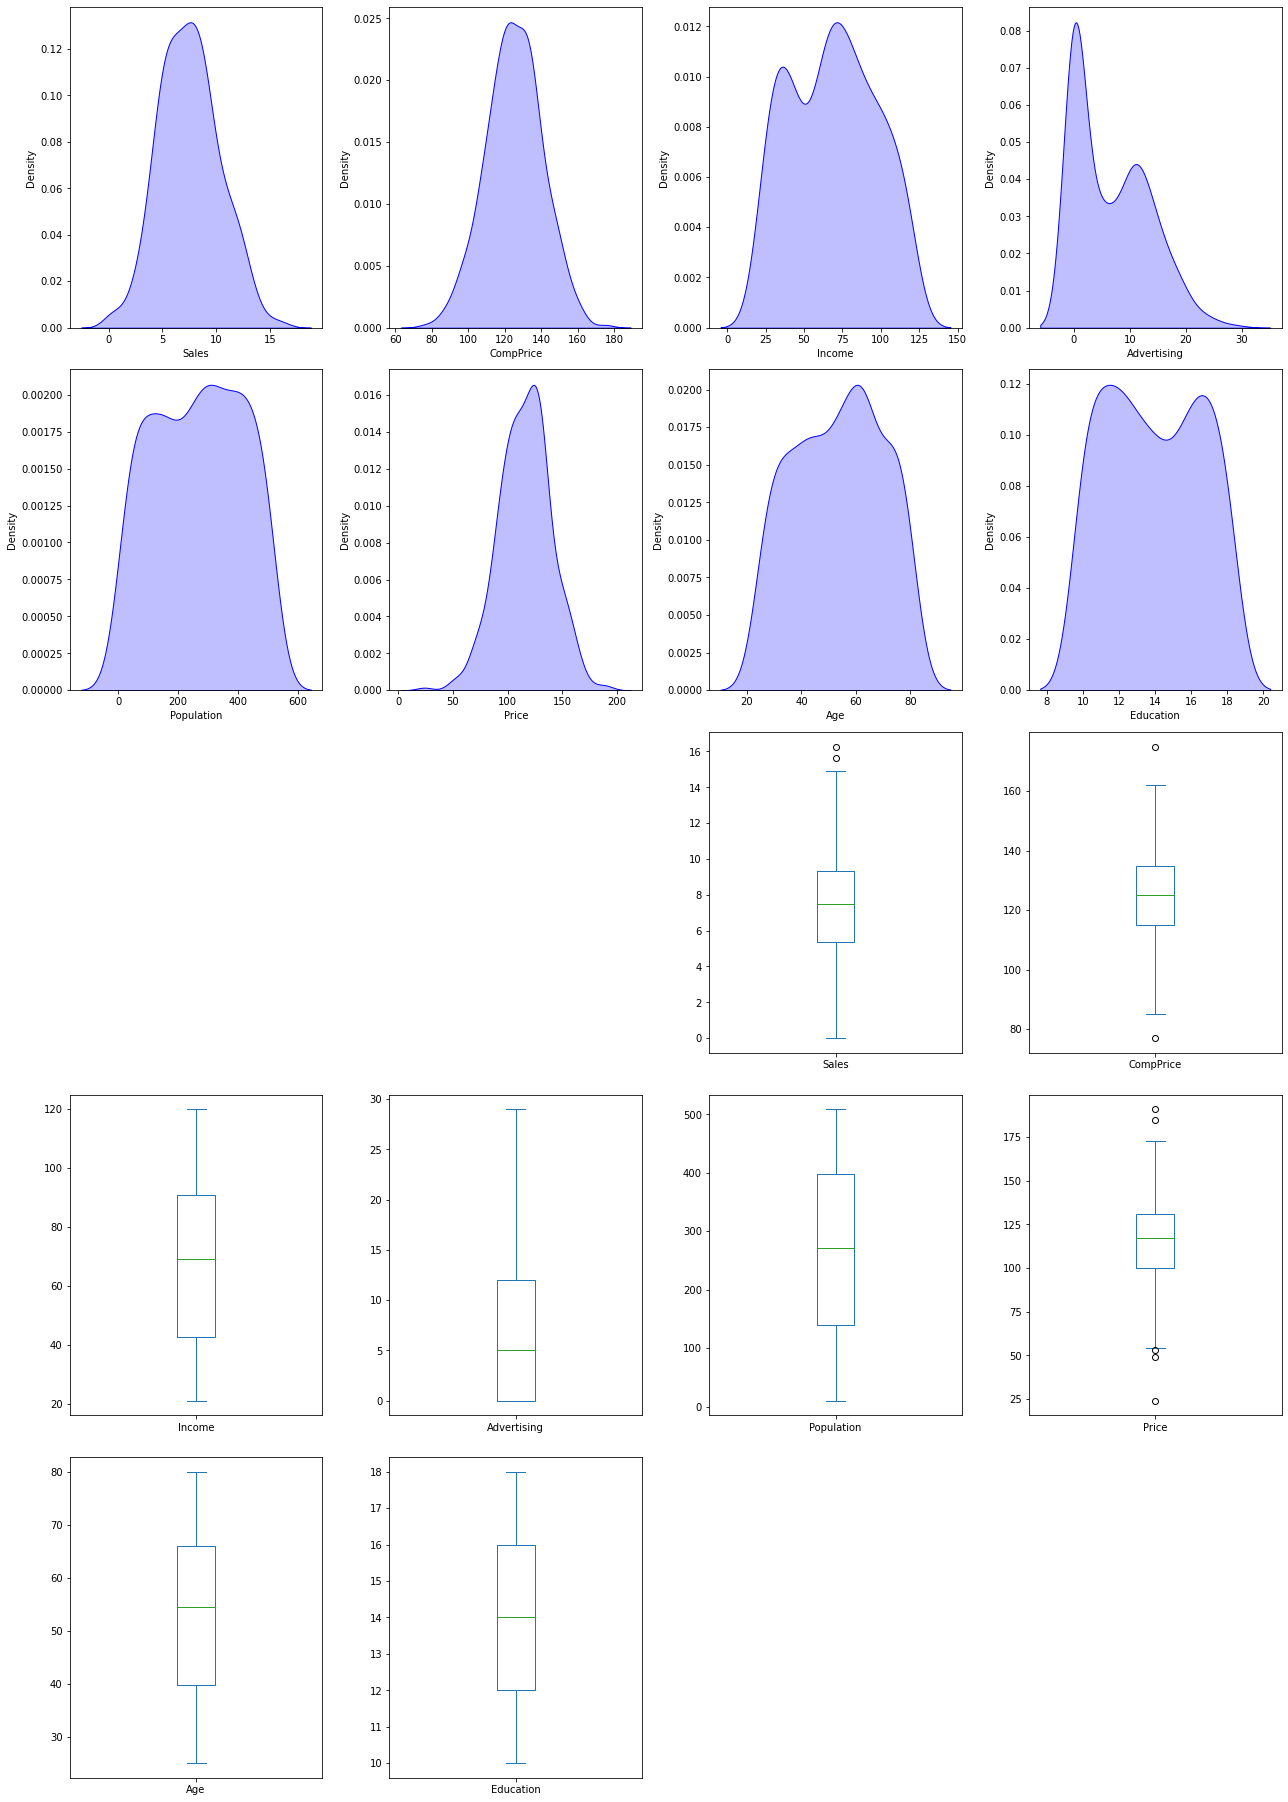

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [101]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


In [102]:
corr = df1.corr()


In [103]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])


In [104]:
corr = df1.corr()


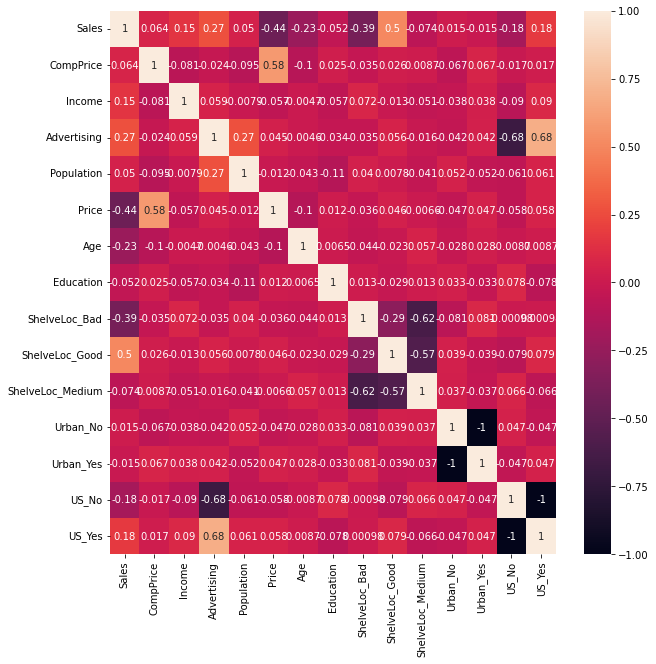

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

# Random Forest Model


# Since the target variable is continious, we create a class of the value based on the mean


<= 7.49 == "Small" and > 7.49 == "large"



In [106]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [107]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [108]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [109]:
y_train.value_counts()

small    162
large    158
Name: sales, dtype: int64

In [110]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.81875

In [111]:
pred_train = model.predict(x_train)


In [112]:
accuracy_score(y_train,pred_train)

1.0

In [113]:
confusion_matrix(y_train,pred_train)

array([[158,   0],
       [  0, 162]], dtype=int64)

In [114]:
pred_test = model.predict(x_test)

In [115]:
accuracy_score(y_test,pred_test)

0.7875

In [116]:
confusion_matrix(y_test,pred_test)

array([[31, 10],
       [ 7, 32]], dtype=int64)

In [117]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [118]:
df_t.head()

,Actual,Predicted
361,large,large
153,small,small
378,small,small
268,small,large
374,large,large


In [119]:
cols = list(df1.columns)


In [120]:
predictors = cols[0:14]
target = cols[14]

In [121]:
tree1 = model.estimators_[20]

In [122]:
dot_data = StringIO()


In [123]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [124]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


# Conclusion

# Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%


# As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not

In [125]:
rf_small = RF(n_estimators=10, max_depth = 3)


In [126]:
rf_small.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=10)

In [127]:
tree_small = rf_small.estimators_[5]


In [128]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)


In [129]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [130]:
model.feature_importances_


array([0.10783237, 0.0987555 , 0.09192216, 0.08790898, 0.23753392,
       0.13346614, 0.06177095, 0.04258718, 0.06823581, 0.02221164,
       0.01239473, 0.01159202, 0.01234775, 0.01144086])

In [131]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [132]:
fi

,feature,importance
4,Price,0.237534
5,Age,0.133466
0,CompPrice,0.107832
1,Income,0.098755
2,Advertising,0.091922
3,Population,0.087909
8,ShelveLoc_Good,0.068236
6,Education,0.061771
7,ShelveLoc_Bad,0.042587
9,ShelveLoc_Medium,0.022212


As seen in the above table Price is most important feature